### Тема: "Обучение без учителя"
#### Домашние задания


#### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:

n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [1]:
# Импортируйте библиотеки pandas, numpy и matplotlib.

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

plt.style.use('fivethirtyeight')

%config InlineBacked.figure_format = 'svg'
%matplotlib inline

In [2]:
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
boston = load_boston()

data = boston["data"]
target = boston["target"]
feature_names = boston["feature_names"]


In [3]:
# создайте датафреймы X и y из этих данных
X = pd.DataFrame(data, columns = feature_names)

#y = pd.DataFrame(target)
y = target

In [4]:
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) 
# с помощью функции train_test_split так, 
# чтобы размер тестовой выборки составлял 20% от всех данных, 
# при этом аргумент random_state должен быть равен 42.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Масштабируйте данные с помощью StandardScaler.
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [6]:
# Постройте модель TSNE на тренировочный данных с параметрами:
# n_components=2, learning_rate=250, random_state=42.

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


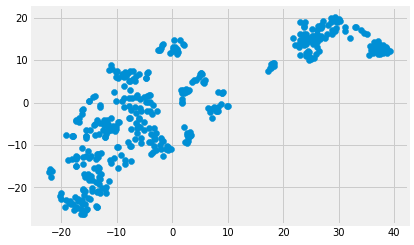

In [7]:
# Постройте диаграмму рассеяния на этих данных
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

#### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,

используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,

и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


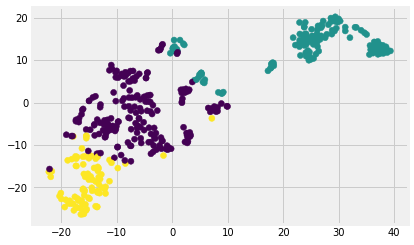

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)
labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [9]:
# Вычислите средние значения price и CRIM в разных кластерах.

print("Среднее значение price: ")
print("Кластер 1: {}".format(y_train[labels_train == 0].mean()))
print("Кластер 2: {}".format(y_train[labels_train == 1].mean()))
print("Кластер 3: {}".format(y_train[labels_train == 2].mean()))
print()
print("Среднее значение CRIM: ")
print("Кластер 1: {}".format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print("Кластер 2: {}".format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print("Кластер 3: {}".format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Среднее значение price: 
Кластер 1: 24.958115183246072
Кластер 2: 16.165354330708663
Кластер 3: 27.78837209302326

Среднее значение CRIM: 
Кластер 1: 0.42166020942408367
Кластер 2: 10.797028425196853
Кластер 3: 0.07356558139534886


#### Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [10]:
labels_test = kmeans.predict(X_test_scaled)


In [11]:
# Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.
print("Средние значения price: ")
print("Кластер 1: {}".format(y_test[labels_test == 0].mean()))
print("Кластер 2: {}".format(y_test[labels_test == 1].mean()))
print("Кластер 3: {}".format(y_test[labels_test == 2].mean()))

print()

print("Средние значения CRIME: ")
print("Кластер 1: {}".format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print("Кластер 2: {}".format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print("Кластер 3: {}".format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Средние значения price: 
Кластер 1: 21.860784313725492
Кластер 2: 16.43714285714286
Кластер 3: 31.35

Средние значения CRIME: 
Кластер 1: 0.26607882352941176
Кластер 2: 10.165531142857143
Кластер 3: 0.062060000000000004
